Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Clean version](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/demos/demo10/demo10.ipynb)

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Modified in class](https://colab.research.google.com/drive/1SK47cU6k9u9iE8LmH5rtDVnz2eIlghDP?usp=sharing)

# Excercise 07 -

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Final_Project')

In [55]:
os.listdir()

['Maryland_Census_Data_-_Census_Tracts(1).geojson',
 'large_scale_map.eps',
 'Maryland_Census_Boundaries_-_Census_Tracts_2020.geojson',
 'ADU_Dataset_Montgomery.csv']

In [6]:
#i was trying to work with census tracts, i will keep work on that later
#crs = 32618
#gdf = gpd.read_file('Maryland_Census_Data_-_Census_Tracts(1).geojson').to_crs(crs)

In [56]:
df_montgomery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project/ADU_Dataset_Montgomery.csv',thousands=',')

In [57]:
df_montgomery

,ACCT,Steet Name,City,ZIP,Licence Type,Lic Status,Point X,Point Y
0,332624,Colesville Manor,SILV,20904,ACC,EX,1311838.0,516893.0
1,1741671,Friars,BETH,20817,ACC,LI,1274691.0,489341.0
2,624230,Elgin,BETH,20817,RLU,AP,1274671.0,477097.0
3,277885,Norwood,SILV,20906,RLU,AP,1310651.0,525154.0
4,40962,Trundle,DICK,20842,RLU,AP,1179133.0,542679.0
...,...,...,...,...,...,...,...,...
1150,382481,Aylesbury,SILV,20905,ACC,LI,1319461.0,523821.0
1151,280473,Blackburn,BURT,20866,RLU,AP,1330802.0,524247.0
1152,1079235,Sycamore,TAKO,20912,ACC,EX,1311029.0,476773.0
1153,3068825,Griffith,LAYT,20882,RLU,AP,1281801.0,570230.0


In [58]:
df_montgomery['geometry'] = gpd.points_from_xy(df_montgomery['Point X'], df_montgomery['Point Y'], crs='EPSG:26918')

In [59]:
df_montgomery.head(5)

,ACCT,Steet Name,City,ZIP,Licence Type,Lic Status,Point X,Point Y,geometry
0,332624,Colesville Manor,SILV,20904,ACC,EX,1311838.0,516893.0,POINT (1311838.000 516893.000)
1,1741671,Friars,BETH,20817,ACC,LI,1274691.0,489341.0,POINT (1274691.000 489341.000)
2,624230,Elgin,BETH,20817,RLU,AP,1274671.0,477097.0,POINT (1274671.000 477097.000)
3,277885,Norwood,SILV,20906,RLU,AP,1310651.0,525154.0,POINT (1310651.000 525154.000)
4,40962,Trundle,DICK,20842,RLU,AP,1179133.0,542679.0,POINT (1179133.000 542679.000)


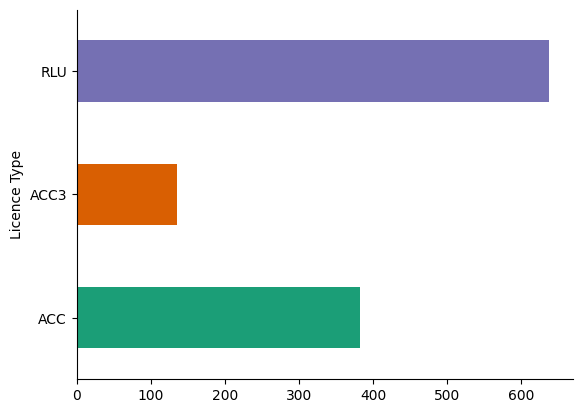

In [62]:
# @title Licence Type

from matplotlib import pyplot as plt
import seaborn as sns
df_montgomery.groupby('Licence Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Though the dataset is named Accessory Dwelling Units(ADU) this maps all the Accessory Units with licenses
#ACC - Approved under Special Exception or Conditional Use standards, Approved before May 20, 2013(adjustment of ordinance)
#ACC3 - ADUs that Meet Limit Use standards, Approved since May 20, 2013, new ADU applications are under this
#RLU - Generally for family and caregivers, Cannot charge rent, In the process of being relicensed as ADUs

<Axes: xlabel='Point X', ylabel='Point Y'>

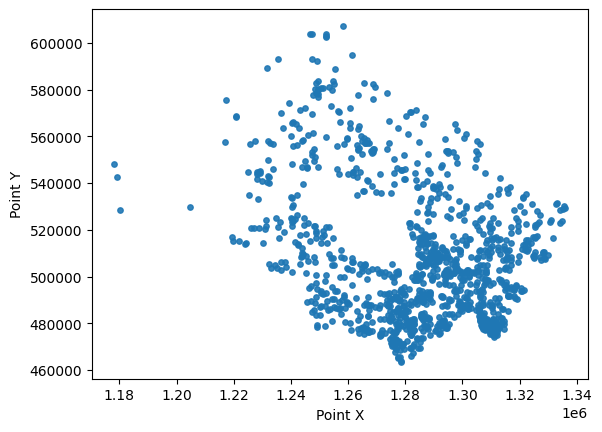

In [60]:
from matplotlib import pyplot as plt
df_montgomery.plot(kind='scatter', x='Point X', y='Point Y', s=15, alpha=.9)

In [ ]:
#currently i am working on mapping RLUs, ACC3 and ACC in different colors, then we will calculate their distance from metro stations
